<a href="https://colab.research.google.com/github/carolmarquezini/preta_lab/blob/main/projeto01_notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1: Sistema de Gestão de Notas de Alunos

**Lidando com Arquivos, Pacotes e Módulos**

Objetivo: O objetivo deste projeto é desenvolver um sistema de gestão de notas de alunos em Python, que faça uso de manipulação de arquivos CSV, módulos e pacotes.



## Cenário - Atividade proposta 🎯


1. Leitura e manipulação de arquivos CSV:

O sistema deve carregar os dados de notas de um arquivo CSV contendo as seguintes colunas:

 - Matrícula

- Nome do Aluno

- Disciplina

- Nota 1

- Nota 2

- Nota 3

- Nota Final

O arquivo de notas está em anexo como notas.csv

2. Divisão em Módulos:

- Módulo de manipulação de arquivos: Função que lê o arquivo CSV e retornam os dados.

- Módulo de análise de notas: Função que calcula a média final dos alunos e identifica se o aluno está aprovado (média ≥ 6) ou reprovado.

- Módulo de geração de relatórios: Função para gerar um arquivo CSV com as médias finais e o status de aprovação de cada aluno.

3. Relatórios:

O sistema deve gerar um arquivo CSV que contenha a média final de cada aluno e o status de aprovado ou reprovado.




**Estrutura do Projeto:**


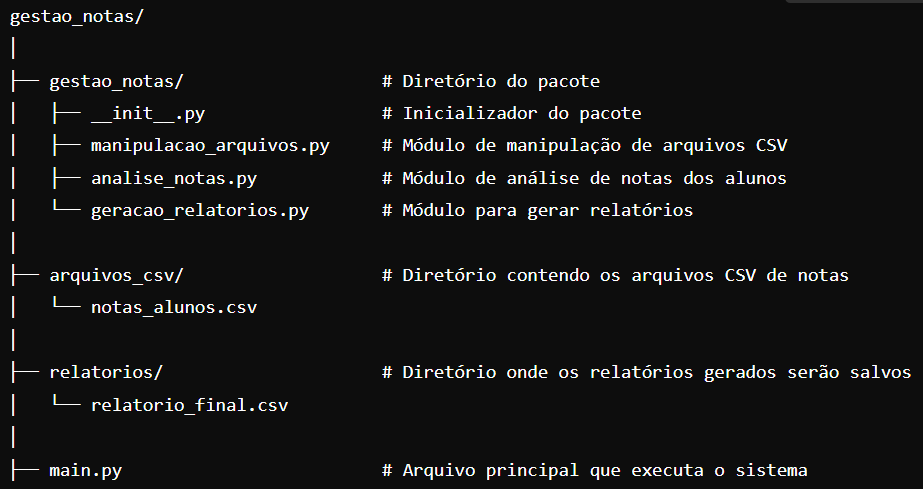

## Preparando o ambiente 💻

In [1]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/pretaLab-ciclo11/projeto01

/content/drive/MyDrive/pretaLab-ciclo11/projeto01


In [3]:
import os
print(os.getcwd())

/content/drive/MyDrive/pretaLab-ciclo11/projeto01


In [4]:
!ls

analise_notas.py    gestao_notas	    projeto01-notas.ipynb  relatorios
arquivos_csv	    main.py		    __pycache__
gerar_relatorio.py  manipulacao_arquivo.py  relatorio_notas.csv


## Módulos 📚

In [75]:
manipular_arquivo = '''
import pandas as pd
import os

file_path = '/content/drive/MyDrive/pretaLab-ciclo11/projeto01/arquivos_csv/notas.csv'

def ler_arquivo_notas(arquivo):
    df = pd.read_csv(arquivo)
    return df

ler_arquivo_notas(file_path)

'''

with open('manipular_arquivo.py', 'w') as modulo:
    modulo.write(manipulacao_arquivo)

In [76]:
analise_notas = '''
def calcular_media_final(df):
    df['Media Final'] = (((df['Nota 1'] + df['Nota 2'] + df['Nota 3']) / 3)).round(1)

    return df

def verificar_status(df):
# cria coluna com status do aluno

    df['Status'] = df['Media Final'].apply(lambda x: 'Aprovado' if x >= 6 else 'Reprovado')
    return df
'''

with open('analise_notas.py', 'w') as modulo:
    modulo.write(analise_notas)

In [77]:
gerar_relatorio = '''
import pandas as pd
import os

def gerar_relatorio_notas(df, caminho_pasta):

    if not os.path.exists(caminho_pasta):
        os.makedirs(caminho_pasta)

    caminho_arquivo = os.path.join(caminho_pasta, 'relatorio_notas.csv')
    df.to_csv(caminho_arquivo, index=False)

    print('Relatório gerado com sucesso!')

'''

with open('gerar_relatorio.py', 'w') as modulo:
    modulo.write(gerar_relatorio)

In [78]:
with open('main.py', 'w') as module:
    module.write(
        '''
import manipular_arquivo
import analise_notas
import gerar_relatorio

df = manipular_arquivo.ler_arquivo_notas('/content/drive/MyDrive/pretaLab-ciclo11/projeto01/arquivos_csv/notas.csv')
df = analise_notas.calcular_media_final(df)
df = analise_notas.verificar_status(df)
gerar_relatorio.gerar_relatorio_notas(df, '/content/drive/MyDrive/pretaLab-ciclo11/projeto01/relatorios/')

df.head()
        '''
    )

!python main.py
print('Executando o main.py')

Relatório gerado com sucesso!
Executando o main.py


## Orgenizando estrutura das pastas 📁

In [79]:
import os
import shutil

# Remove o arquivo de destino se ele existir
if os.path.exists('gestao_notas/manipular_arquivo.py'):
  os.remove('gestao_notas/manipular_arquivo.py')
if os.path.exists('gestao_notas/analise_notas.py'):
  os.remove('gestao_notas/analise_notas.py')
if os.path.exists('gestao_notas/gerar_relatorio.py'):
  os.remove('gestao_notas/gerar_relatorio.py')

# Move os arquivos
shutil.move('manipular_arquivo.py', 'gestao_notas')
shutil.move('analise_notas.py', 'gestao_notas')
shutil.move('gerar_relatorio.py', 'gestao_notas')

'gestao_notas/gerar_relatorio.py'

In [80]:
!ls

arquivos_csv  gestao_notas  main.py  projeto01-notas.ipynb  __pycache__  relatorios
